## PRT Model Trial

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
import seaborn as sns
import datetime

## 1. Read csv

In [2]:
route_info = pd.read_csv("PRT_data.csv")
route_info.head()

,Date,Start SOC,End SOC,Duration,Distance,Seasonality,Electric_use
0,12/1/2022,79.6,34.0,4:23:27,88.0,1,45.6
1,12/12/2022,78.0,43.2,5:22:42,51.0,1,34.8
2,12/12/2022,42.4,30.4,1:45:34,19.0,1,12.0
3,12/12/2022,29.6,10.0,1:54:37,17.0,1,19.6
4,12/12/2022,18.0,16.8,0:04:01,2.0,1,1.2


In [3]:
route_info

,Date,Start SOC,End SOC,Duration,Distance,Seasonality,Electric_use
0,12/1/2022,79.6,34.0,4:23:27,88.00,1,45.6
1,12/12/2022,78.0,43.2,5:22:42,51.00,1,34.8
2,12/12/2022,42.4,30.4,1:45:34,19.00,1,12.0
3,12/12/2022,29.6,10.0,1:54:37,17.00,1,19.6
4,12/12/2022,18.0,16.8,0:04:01,2.00,1,1.2
...,...,...,...,...,...,...,...
381,19-Jul,90.4,69.2,3:08:54,38.37,0,21.2
382,19-Jul,68.8,58.0,1:21:24,22.29,0,10.8
383,19-Jul,58.0,49.6,1:29:28,17.16,0,8.4
384,19-Jul,49.6,47.6,0:25:08,6.60,0,2.0


## Duration

In [4]:
start_time0 = datetime.datetime.strptime('00:00:00', '%H:%M:%S')

for i in range(len(route_info)):
    current_duration = datetime.datetime.strptime(route_info.loc[i, 'Duration'], '%H:%M:%S')
    route_info.loc[i, 'timeDelta_seconds'] = (current_duration - start_time0).total_seconds()
    route_info.loc[i, 'timeDelta_minutes'] = route_info.loc[i, 'timeDelta_seconds'] / 60

In [5]:
route_info

,Date,Start SOC,End SOC,Duration,Distance,Seasonality,Electric_use,timeDelta_seconds,timeDelta_minutes
0,12/1/2022,79.6,34.0,4:23:27,88.00,1,45.6,15807.0,263.450000
1,12/12/2022,78.0,43.2,5:22:42,51.00,1,34.8,19362.0,322.700000
2,12/12/2022,42.4,30.4,1:45:34,19.00,1,12.0,6334.0,105.566667
3,12/12/2022,29.6,10.0,1:54:37,17.00,1,19.6,6877.0,114.616667
4,12/12/2022,18.0,16.8,0:04:01,2.00,1,1.2,241.0,4.016667
...,...,...,...,...,...,...,...,...,...
381,19-Jul,90.4,69.2,3:08:54,38.37,0,21.2,11334.0,188.900000
382,19-Jul,68.8,58.0,1:21:24,22.29,0,10.8,4884.0,81.400000
383,19-Jul,58.0,49.6,1:29:28,17.16,0,8.4,5368.0,89.466667
384,19-Jul,49.6,47.6,0:25:08,6.60,0,2.0,1508.0,25.133333


## 2. Exploratory Data Analysis

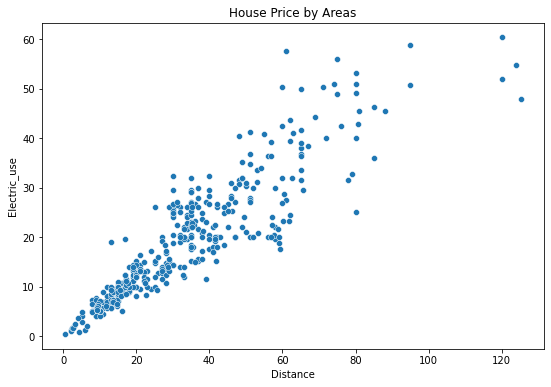

In [8]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='Distance', y='Electric_use', data=route_info)
title = plt.title('House Price by Areas')

## Linear Regression

In [9]:
# Split X and Y
X = route_info.drop(['Date','Start SOC','End SOC','Duration','Electric_use', 'timeDelta_seconds', 'timeDelta_minutes'], axis=1)

y = route_info['Electric_use']

In [10]:
y

0      45.6
1      34.8
2      12.0
3      19.6
4       1.2
       ... 
381    21.2
382    10.8
383     8.4
384     2.0
385    54.8
Name: Electric_use, Length: 386, dtype: float64

In [11]:
X.isna().sum()

Distance       0
Seasonality    0
dtype: int64

In [12]:
type(X)

pandas.core.frame.DataFrame

In [13]:
import statsmodels.api as sm

X = sm.add_constant(X, prepend=False)

# Fit and summarize OLS model
mod = sm.OLS(y, X)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Electric_use   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     1086.
Date:                Tue, 21 Mar 2023   Prob (F-statistic):          1.38e-158
Time:                        12:33:17   Log-Likelihood:                -1147.6
No. Observations:                 386   AIC:                             2301.
Df Residuals:                     383   BIC:                             2313.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Distance        0.4972      0.011     44.174      

In [14]:
# two models

# evaluate how good it is

# multivariant after elevation

## Model 2

In [15]:
# Split X and Y
X_2 = route_info.drop(['Date','Start SOC','End SOC','Electric_use','Duration', 'timeDelta_seconds'], axis=1)

y_2 = route_info['Electric_use']

In [16]:
type(X_2['Distance'])

pandas.core.series.Series

In [17]:
import statsmodels.api as sm

X_2 = sm.add_constant(X_2, prepend=False)

# Fit and summarize OLS model
mod2 = sm.OLS(y_2, X_2)

res2 = mod2.fit()

print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:           Electric_use   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1264.
Date:                Tue, 21 Mar 2023   Prob (F-statistic):          6.35e-198
Time:                        12:33:17   Log-Likelihood:                -1052.3
No. Observations:                 386   AIC:                             2113.
Df Residuals:                     382   BIC:                             2129.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Distance              0.2624      0.01

## Model 3

In [18]:
# Split X and Y
X_3 = route_info.drop(['Date','Start SOC','End SOC','Electric_use','Duration', 'timeDelta_seconds','Distance'], axis=1)

y_3 = route_info['Electric_use']

In [19]:
X_3

,Seasonality,timeDelta_minutes
0,1,263.450000
1,1,322.700000
2,1,105.566667
3,1,114.616667
4,1,4.016667
...,...,...
381,0,188.900000
382,0,81.400000
383,0,89.466667
384,0,25.133333


In [20]:
import statsmodels.api as sm

X_3 = sm.add_constant(X_3, prepend=False)

# Fit and summarize OLS model
mod2 = sm.OLS(y_3, X_3)

res3 = mod2.fit()

print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:           Electric_use   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     1122.
Date:                Tue, 21 Mar 2023   Prob (F-statistic):          7.08e-161
Time:                        12:33:17   Log-Likelihood:                -1142.2
No. Observations:                 386   AIC:                             2290.
Df Residuals:                     383   BIC:                             2302.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Seasonality           6.4858      0.48

## Summer model

In [21]:
route_info

,Date,Start SOC,End SOC,Duration,Distance,Seasonality,Electric_use,timeDelta_seconds,timeDelta_minutes
0,12/1/2022,79.6,34.0,4:23:27,88.00,1,45.6,15807.0,263.450000
1,12/12/2022,78.0,43.2,5:22:42,51.00,1,34.8,19362.0,322.700000
2,12/12/2022,42.4,30.4,1:45:34,19.00,1,12.0,6334.0,105.566667
3,12/12/2022,29.6,10.0,1:54:37,17.00,1,19.6,6877.0,114.616667
4,12/12/2022,18.0,16.8,0:04:01,2.00,1,1.2,241.0,4.016667
...,...,...,...,...,...,...,...,...,...
381,19-Jul,90.4,69.2,3:08:54,38.37,0,21.2,11334.0,188.900000
382,19-Jul,68.8,58.0,1:21:24,22.29,0,10.8,4884.0,81.400000
383,19-Jul,58.0,49.6,1:29:28,17.16,0,8.4,5368.0,89.466667
384,19-Jul,49.6,47.6,0:25:08,6.60,0,2.0,1508.0,25.133333


In [6]:
summer = route_info[route_info['Seasonality'] == 0]
summer

,Date,Start SOC,End SOC,Duration,Distance,Seasonality,Electric_use,timeDelta_seconds,timeDelta_minutes
219,1-Jul,78.4,62.8,3:35:12,38.00,0,15.6,12912.0,215.200000
220,1-Jul,77.6,55.2,3:41:14,35.00,0,22.4,13274.0,221.233333
221,6-Jul,77.6,58.0,3:38:14,58.00,0,19.6,13094.0,218.233333
222,6-Jul,79.2,60.4,2:21:52,59.00,0,18.8,8512.0,141.866667
223,7-Jul,78.8,58.8,3:25:10,56.00,0,20.0,12310.0,205.166667
...,...,...,...,...,...,...,...,...,...
381,19-Jul,90.4,69.2,3:08:54,38.37,0,21.2,11334.0,188.900000
382,19-Jul,68.8,58.0,1:21:24,22.29,0,10.8,4884.0,81.400000
383,19-Jul,58.0,49.6,1:29:28,17.16,0,8.4,5368.0,89.466667
384,19-Jul,49.6,47.6,0:25:08,6.60,0,2.0,1508.0,25.133333


### Summer only consider time

In [7]:
# Split X and Y
X_4 = summer.drop(['Date','Start SOC','End SOC','Electric_use','Duration', 'timeDelta_seconds','Distance', 'Seasonality'], axis=1)

y_4 = summer['Electric_use']

In [8]:
X_4

,timeDelta_minutes
219,215.200000
220,221.233333
221,218.233333
222,141.866667
223,205.166667
...,...
381,188.900000
382,81.400000
383,89.466667
384,25.133333


In [9]:
import statsmodels.api as sm

X_4 = sm.add_constant(X_4, prepend=False)

# Fit and summarize OLS model
mod4 = sm.OLS(y_4, X_4)

res4 = mod4.fit()

print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:           Electric_use   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1702.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           7.60e-89
Time:                        17:28:55   Log-Likelihood:                -424.18
No. Observations:                 167   AIC:                             852.4
Df Residuals:                     165   BIC:                             858.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
timeDelta_minutes     0.0907      0.00

### Summer only considers distance

In [10]:
# Split X and Y
X_5 = summer.drop(['Date','Start SOC','End SOC','Electric_use','Duration', 'timeDelta_seconds','timeDelta_minutes', 'Seasonality'], axis=1)

y_5 = summer['Electric_use']

In [11]:
X_5

,Distance
219,38.00
220,35.00
221,58.00
222,59.00
223,56.00
...,...
381,38.37
382,22.29
383,17.16
384,6.60


In [12]:
import statsmodels.api as sm

X_5 = sm.add_constant(X_5, prepend=False)

# Fit and summarize OLS model
mod5 = sm.OLS(y_5, X_5)

res5 = mod5.fit()

print(res5.summary())

                            OLS Regression Results                            
Dep. Variable:           Electric_use   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1106.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           4.63e-75
Time:                        17:29:45   Log-Likelihood:                -456.28
No. Observations:                 167   AIC:                             916.6
Df Residuals:                     165   BIC:                             922.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Distance       0.4125      0.012     33.260      0.0

### Summer considers distance and time

In [13]:
# Split X and Y
X_6 = summer.drop(['Date','Start SOC','End SOC','Electric_use','Duration', 'timeDelta_seconds', 'Seasonality'], axis=1)

y_6 = summer['Electric_use']

In [14]:
import statsmodels.api as sm

X_6 = sm.add_constant(X_6, prepend=False)

# Fit and summarize OLS model
mod6 = sm.OLS(y_6, X_6)

res6 = mod6.fit()

print(res6.summary())

                            OLS Regression Results                            
Dep. Variable:           Electric_use   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1494.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):          5.51e-106
Time:                        17:29:59   Log-Likelihood:                -379.97
No. Observations:                 167   AIC:                             765.9
Df Residuals:                     164   BIC:                             775.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Distance              0.1799      0.01

## Winter

In [23]:
winter = route_info[route_info['Seasonality'] == 1]
winter

,Date,Start SOC,End SOC,Duration,Distance,Seasonality,Electric_use,timeDelta_seconds,timeDelta_minutes
0,12/1/2022,79.6,34.0,4:23:27,88.0,1,45.6,15807.0,263.450000
1,12/12/2022,78.0,43.2,5:22:42,51.0,1,34.8,19362.0,322.700000
2,12/12/2022,42.4,30.4,1:45:34,19.0,1,12.0,6334.0,105.566667
3,12/12/2022,29.6,10.0,1:54:37,17.0,1,19.6,6877.0,114.616667
4,12/12/2022,18.0,16.8,0:04:01,2.0,1,1.2,241.0,4.016667
...,...,...,...,...,...,...,...,...,...
214,25-Feb,72.4,59.2,1:30:28,21.0,1,13.2,5428.0,90.466667
215,25-Feb,56.0,35.6,1:36:29,35.0,1,20.4,5789.0,96.483333
216,28-Feb,89.6,53.2,3:52:12,65.0,1,36.4,13932.0,232.200000
217,28-Feb,86.4,61.6,3:00:56,44.0,1,24.8,10856.0,180.933333


### winter both time and distance

In [16]:
# Split X and Y
X_7 = winter.drop(['Date','Start SOC','End SOC','Electric_use','Duration', 'timeDelta_seconds', 'Seasonality'], axis=1)

y_7 = winter['Electric_use']

In [17]:
import statsmodels.api as sm

X_7 = sm.add_constant(X_7, prepend=False)

# Fit and summarize OLS model
mod7 = sm.OLS(y_7, X_7)

res7 = mod7.fit()

print(res7.summary())

                            OLS Regression Results                            
Dep. Variable:           Electric_use   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1363.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):          3.28e-123
Time:                        17:31:01   Log-Likelihood:                -579.96
No. Observations:                 219   AIC:                             1166.
Df Residuals:                     216   BIC:                             1176.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Distance              0.3257      0.02

### Winter only distance

In [18]:
# Split X and Y
X_8 = winter.drop(['Date','Start SOC','End SOC','Electric_use','Duration', 'timeDelta_seconds','timeDelta_minutes', 'Seasonality'], axis=1)

y_8 = winter['Electric_use']

In [19]:
import statsmodels.api as sm

X_8 = sm.add_constant(X_8, prepend=False)

# Fit and summarize OLS model
mod8 = sm.OLS(y_8, X_8)

res8 = mod8.fit()

print(res8.summary())

                            OLS Regression Results                            
Dep. Variable:           Electric_use   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1297.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           1.67e-93
Time:                        17:31:06   Log-Likelihood:                -653.17
No. Observations:                 219   AIC:                             1310.
Df Residuals:                     217   BIC:                             1317.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Distance       0.5857      0.016     36.017      0.0

### Winter only time

In [20]:
# Split X and Y
X_9 = winter.drop(['Date','Start SOC','End SOC','Electric_use','Duration','Distance', 'timeDelta_seconds', 'Seasonality'], axis=1)

y_9 = winter['Electric_use']

In [21]:
X_9 = sm.add_constant(X_9, prepend=False)

# Fit and summarize OLS model
mod9 = sm.OLS(y_9, X_9)

res9 = mod9.fit()

print(res9.summary())

                            OLS Regression Results                            
Dep. Variable:           Electric_use   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1220.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           4.80e-91
Time:                        17:31:10   Log-Likelihood:                -658.88
No. Observations:                 219   AIC:                             1322.
Df Residuals:                     217   BIC:                             1329.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
timeDelta_minutes     0.1322      0.00

## All data with no seasonality